0 ---> 170315 Single 003 fg300 ccr.txt (1024, 2)
1 ---> Single 001 fg300 ccr.txt (1024, 2)
2 ---> Single 002 fg300 ccr.txt (1024, 2)
3 ---> 170315 Single 002 fg300 ccr.txt (1024, 2)


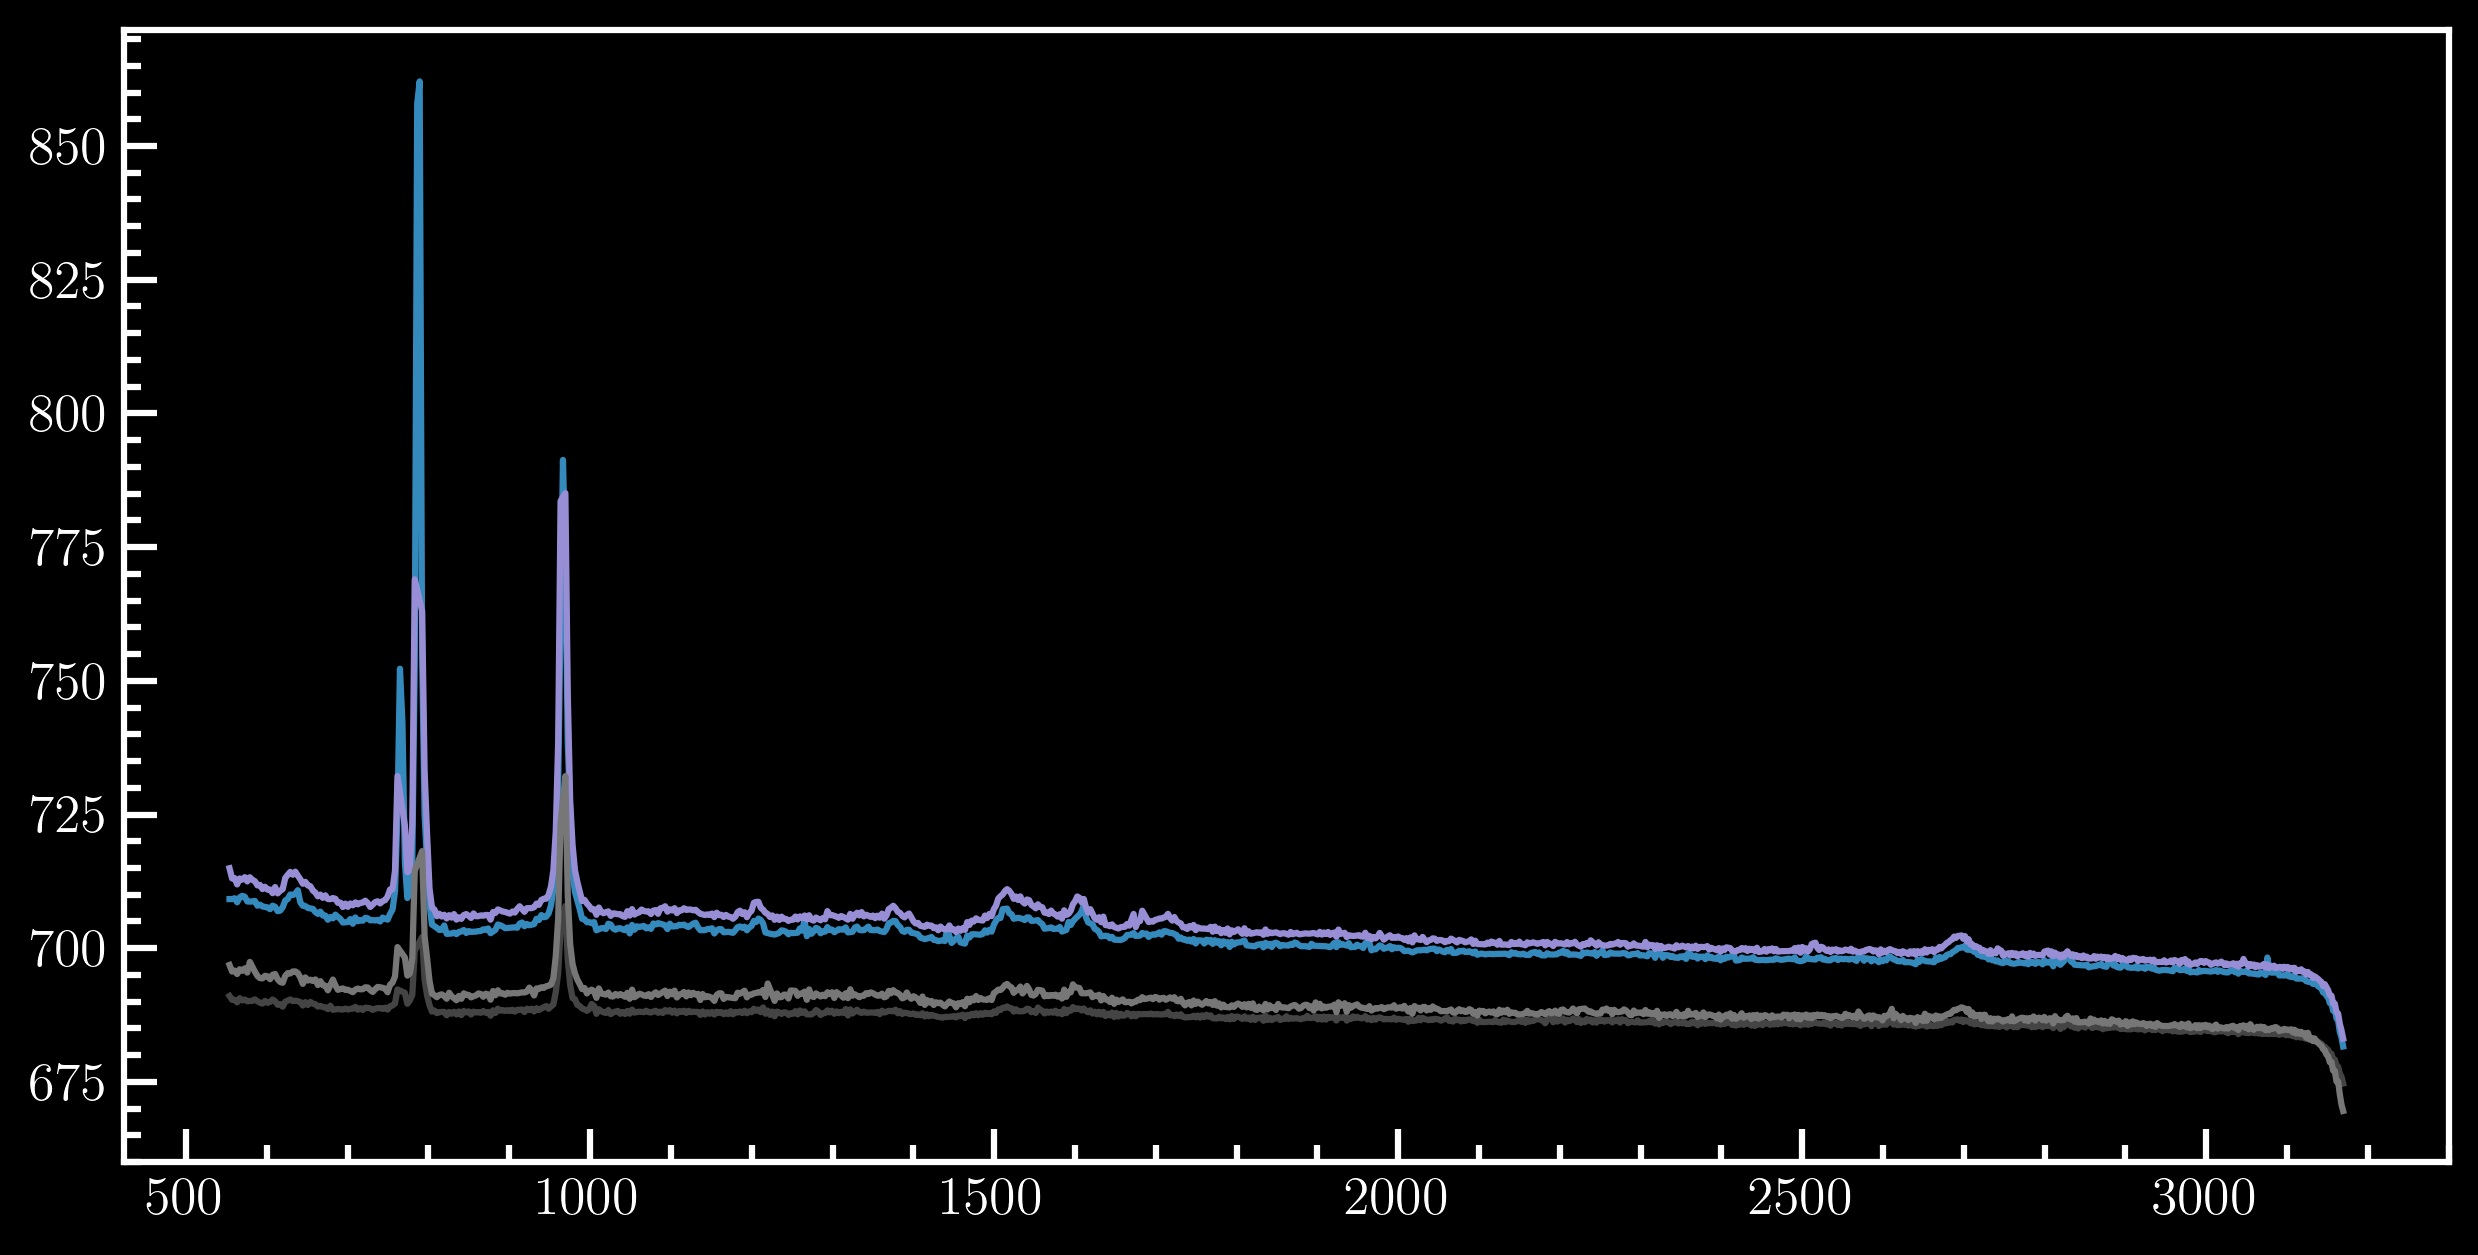

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import glob,os,sys
from IPython.display import display, clear_output
from labexp import experiments
plt.style.use('/media/labfiles/lab-codes/plot-styles/plotstyle.mplstyle')

path="/media/labfiles/Gabriela-FR/Experimentos/Graphene/RAMAN/fg300/"
from scipy.signal import savgol_filter

class analysis:
    def __init__ (self,path):
        self.path=path
        self.files=glob.glob(self.path+'*.txt')
        self.data=[]
        for i,j in enumerate(self.files):
            idata = np.loadtxt(j)
            self.data.append(idata)
            dims=idata.shape
            print("%d ---> %s %s"%(i,j.split('/')[-1],dims))
            plt.plot(idata[:,0],idata[:,1])
    
    def spectra(self,nopts=11,grade=1,plot1=2,plot2=4):
        self.expdata= np.zeros((1024,5))
        self.expdata[:,0]=self.data[0][:,0]
        
        fig,(ax0,ax1)=plt.subplots(1,2,figsize=(10,5))
        for i in range(2,4):
            spr = savgol_filter(self.expdata[:,i], 1024, 1) 
            ax0.plot(expdata[:,0],spr) 
            ax0.plot(expdata[:,0],expdata[:,i]) 
            wdata= expdata[:,i]-spr
            ax1.plot(expdata[:,0],wdata)
            expdatav2[:,i]=wdata 

fg300=analysis(path).data

In [85]:
expdata= np.zeros((1024,5))
expdata[:,0]=fg300[0][:,0]
for i,j in enumerate(fg300):
    expdata[:,i+1]=j[:,1]
np.savetxt('data/fg300.dat',expdata,delimiter=',')

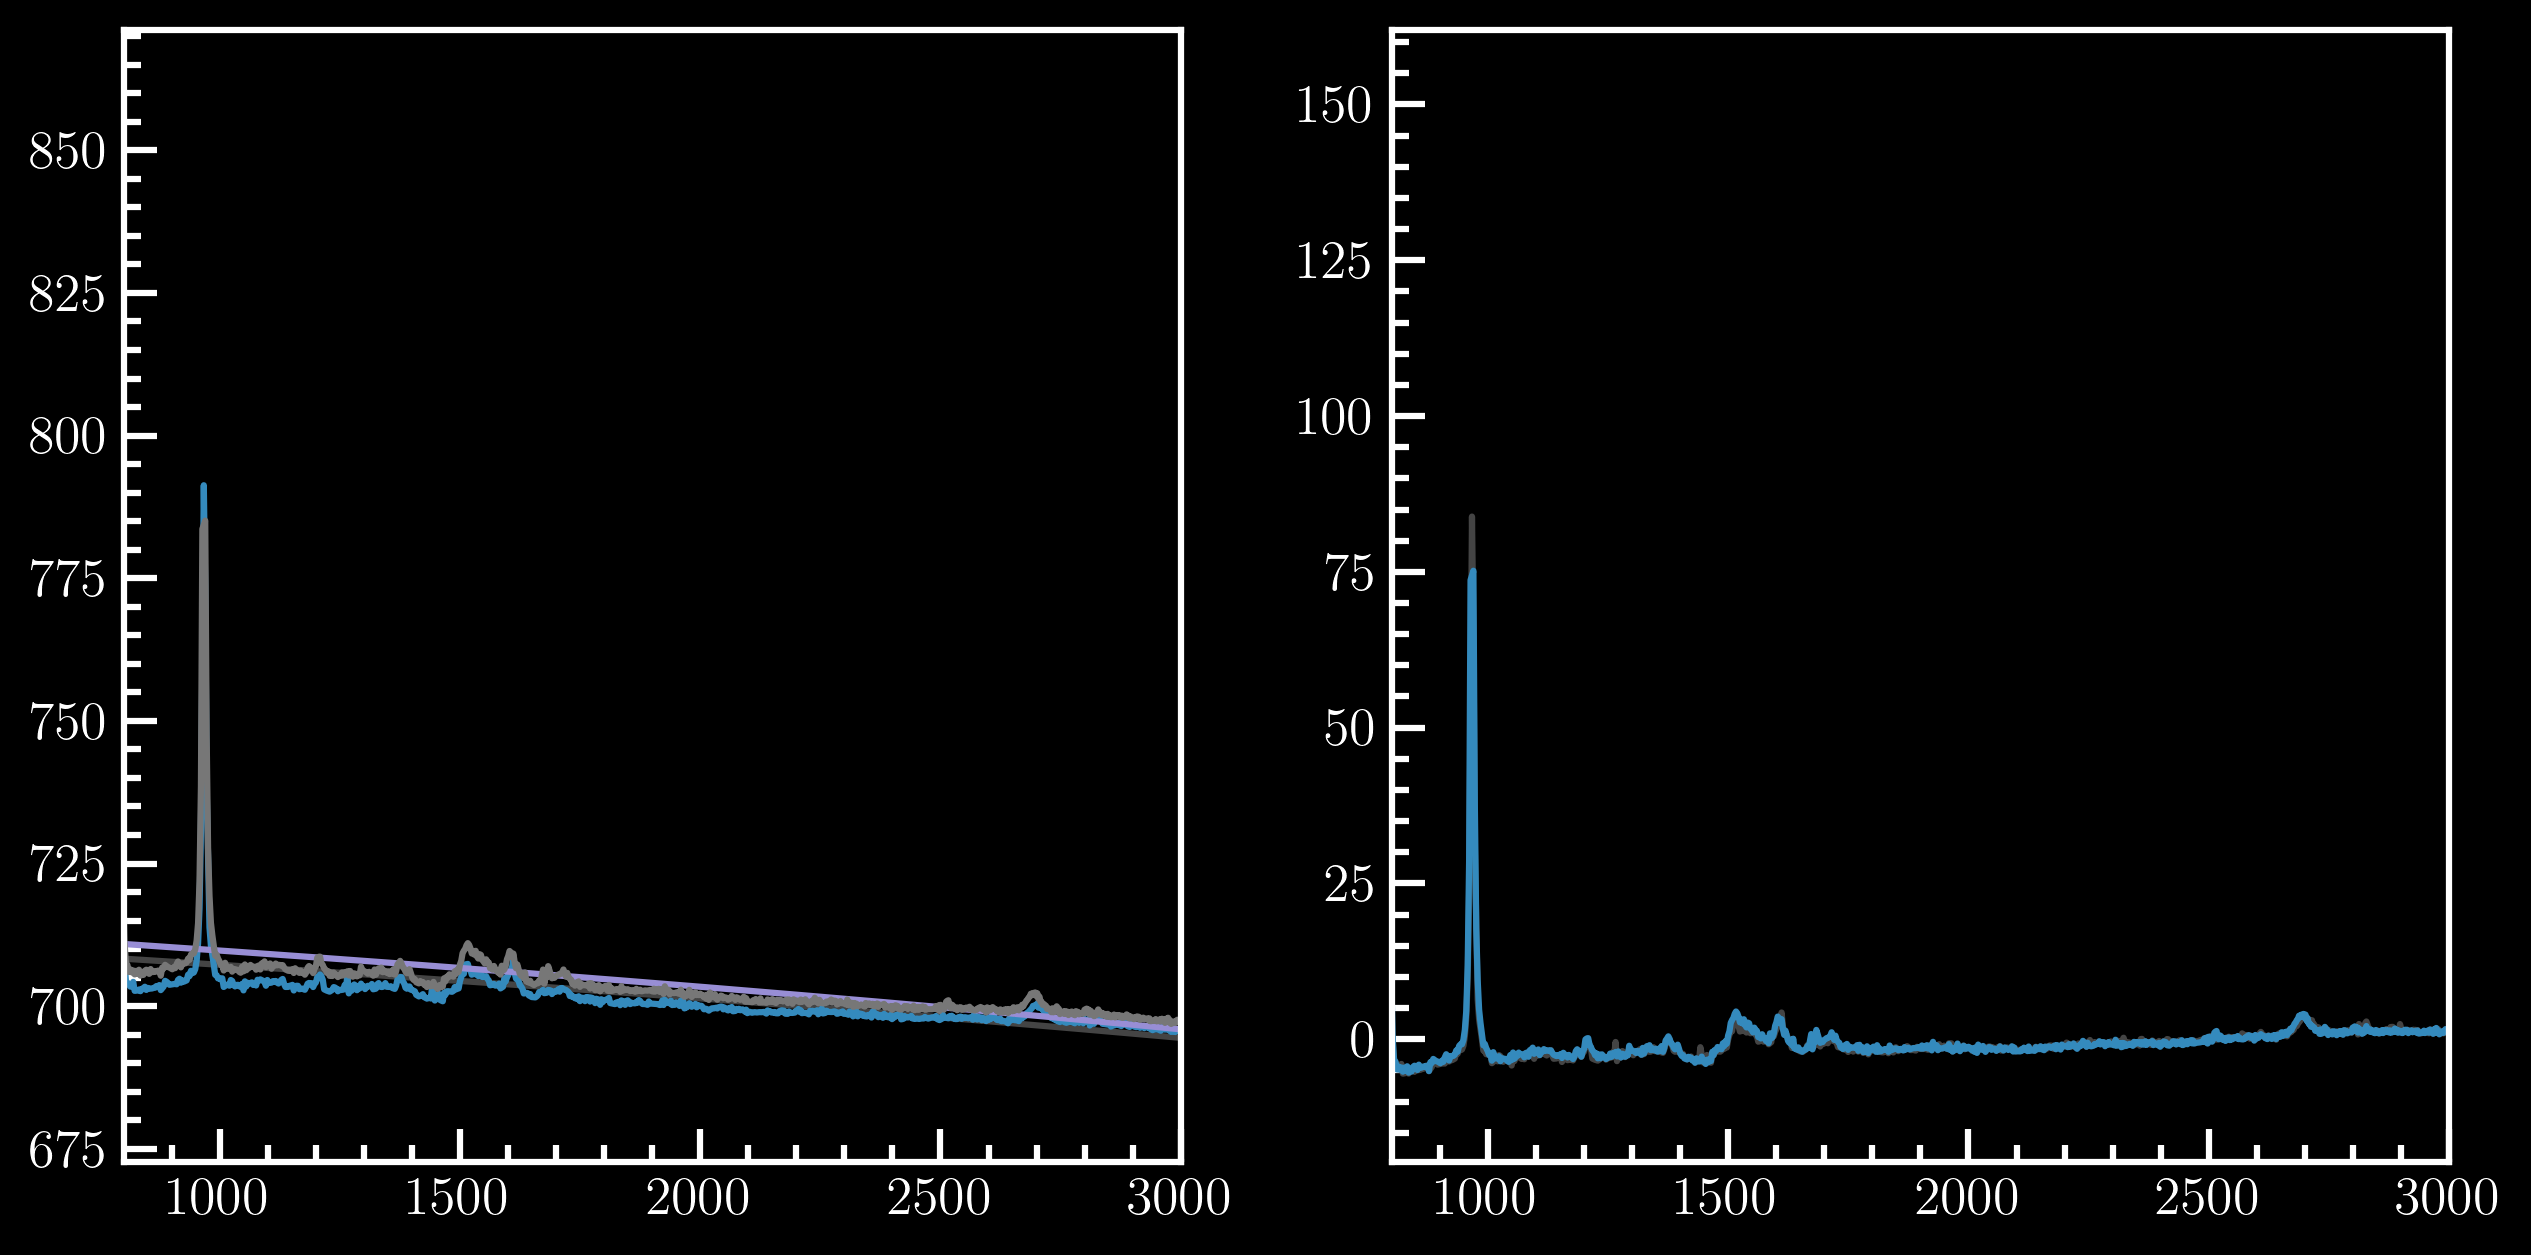

In [86]:
from scipy.signal import savgol_filter

expdatav2= np.zeros((1024,5))
expdatav2[:,0]=data[0][:,0]
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(10,5))
for i in range(2,4):
    spr = savgol_filter(expdata[:,i], 1024, 1) 
    ax0.plot(expdata[:,0],spr) 
    ax0.plot(expdata[:,0],expdata[:,i]) 
    wdata= expdata[:,i]-spr
    ax1.plot(expdata[:,0],wdata)
    expdatav2[:,i]=wdata



for axi in fig.axes:
    axi.set_xlim([800,3000])

np.savetxt('data/fg300-v2.dat',expdatav2,delimiter=',')

0 ---> Line_000_Spec.Data 1 (CRR) (Total Average).txt (1024, 2)
1 ---> Line_000_Spec.Data 1 (CRR).txt (1024, 41)


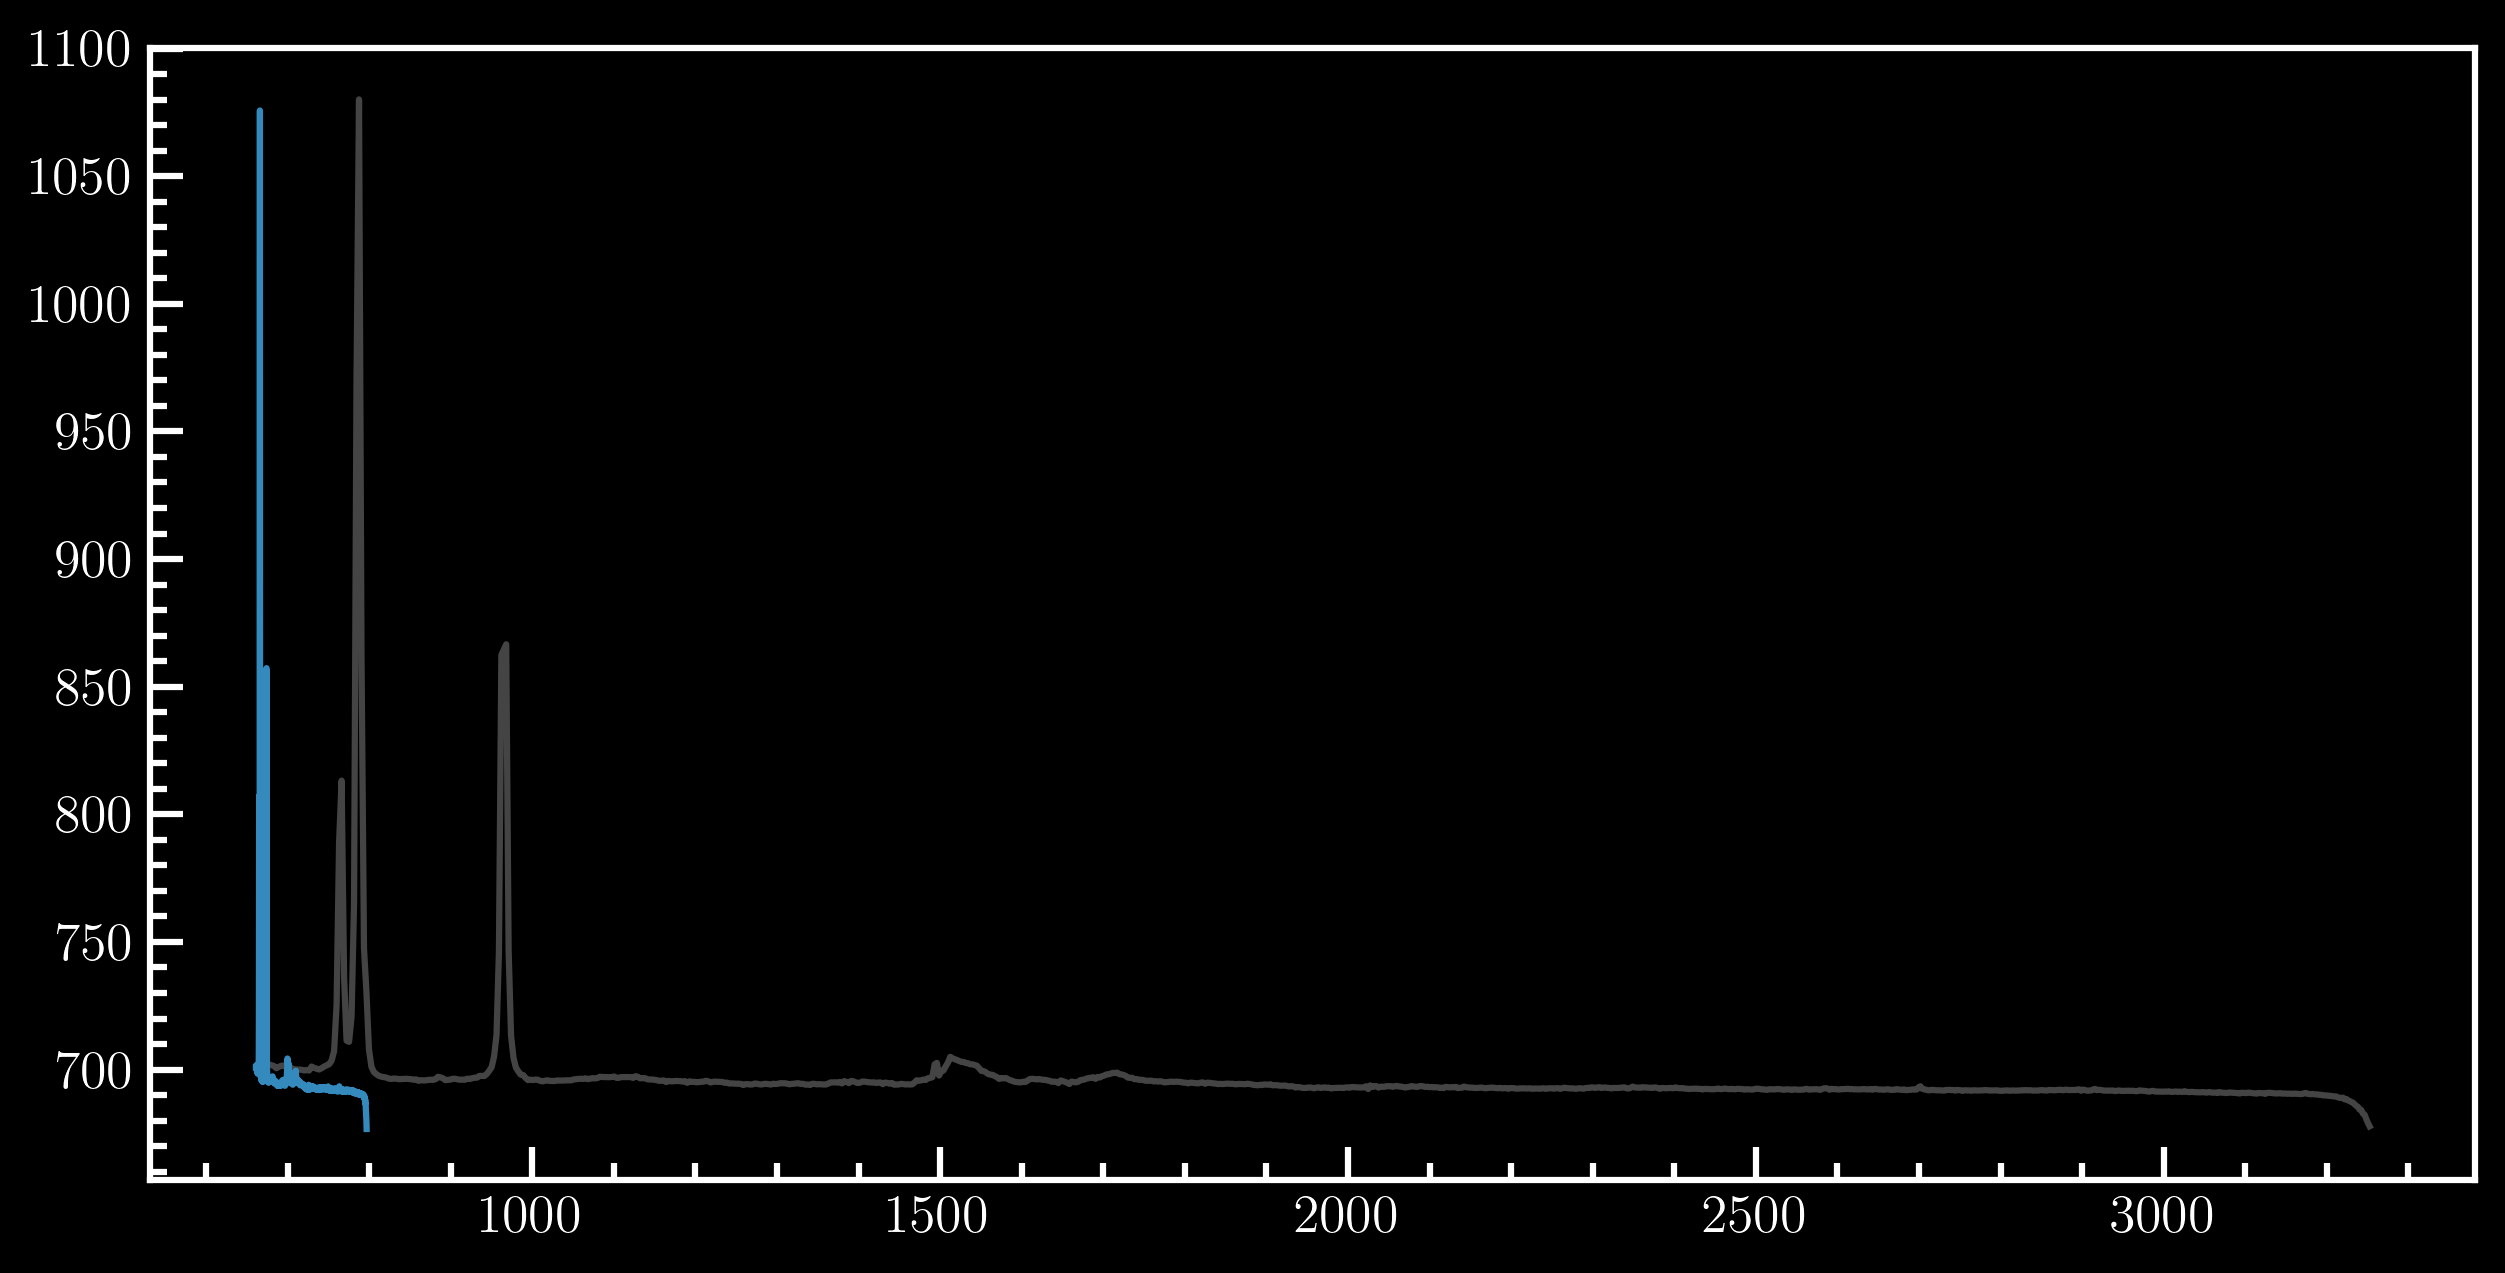

In [87]:
path="/media/labfiles/Gabriela-FR/Experimentos/Graphene/RAMAN/fg166l/"
fg166l=analysis(path).data

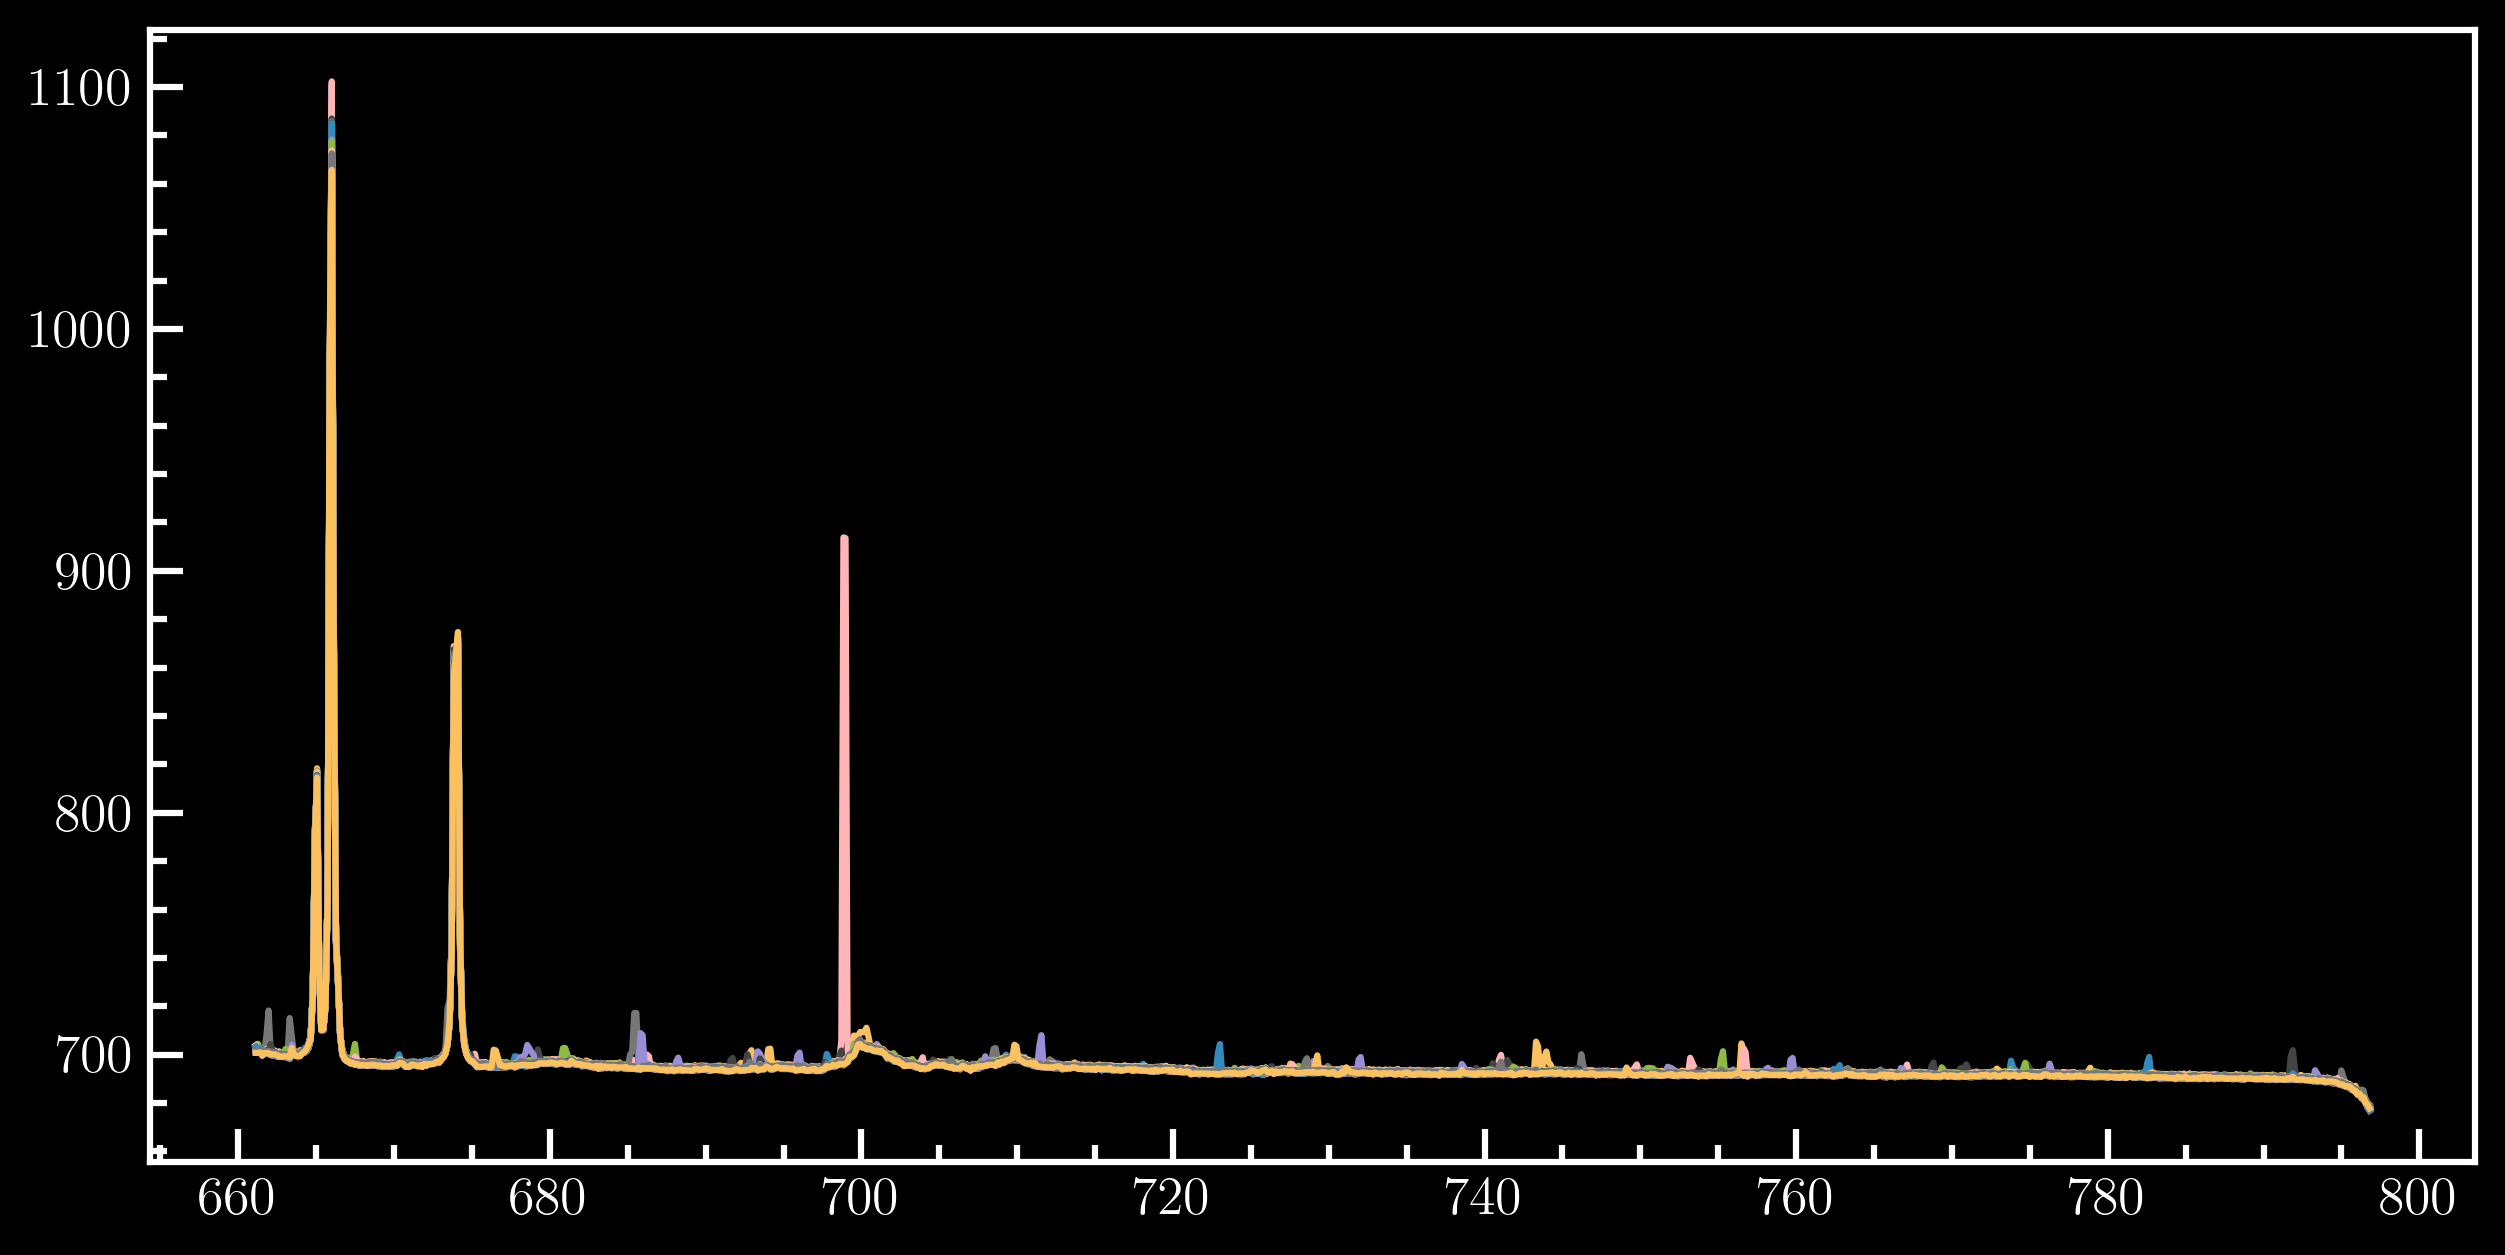

In [90]:
for i in range (1,fg166l[1].shape[1]):
    plt.plot(fg166l[1][:,0],fg166l[1][:,i])